In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
# Define function for dice roll
def roll_dice(num_rolls):
    # Generate 'num_rolls' random numbers between 1 and 6
    return np.random.randint(1, 7, num_rolls)

# Function to simulate a full battle until one side is defeated
def simulate_battle():
    # Start with 3 attackers and 2 defenders
    attackers, defenders = 3, 2

    # Loop until either attackers or defenders run out of 'troops'
    while attackers > 0 and defenders > 0:
        # Roll dice for attackers and sort rolls highest to lowest 
        attack_rolls = np.sort(roll_dice(attackers))[::-1]
        # Roll dice for defenders and sort rolls highest to lowest
        defense_rolls = np.sort(roll_dice(defenders))[::-1]
       # Set the number of dice to compare (use the smaller number of dice rolled)
        rounds = min(len(attack_rolls), len(defense_rolls))
       # Compare the top two rolls and determine losses
        attacker_losses = np.sum(attack_rolls[:2] <= defense_rolls[:2])
        defender_losses = rounds - attacker_losses
        # Update the counts of attackers and defenders
        attackers -= attacker_losses
        defenders -= defender_losses

# Return the losses for attackers and defenders
    return attacker_losses, defender_losses

# Number of battle rounds to simulate
x_repeats = 1000

# Create list to store losses for each round
attacker_losses_list = []
defender_losses_list = []

# Create a loop to run 'x_repeats' number of battles
for _ in range(x_repeats):
    # Run 'simulate_battle' function and collect results
    attacker_losses, defender_losses = simulate_battle()
    
    # Append to list and store the losses from eachround
    attacker_losses_list.append(attacker_losses)
    defender_losses_list.append(defender_losses)


# Count total losses for attackers and defenders
total_attacker_losses = sum(attacker_losses_list)
total_defender_losses = sum(defender_losses_list)


[Reference: Risk-simulator](https://github.com/attoPascal/risk-simulator/blob/master/risk.py) <br/>
[Reference: Using Python’s NumPy To Improve Your Board Game Strategy: Your Odds When Attacking in ‘Risk’](https://thepythoncodingbook.com/2022/12/30/using-python-numpy-to-improve-board-game-strategy-risk/) <br/>
[Reference: Efficiently sorting a numpy array in descending order?](https://stackoverflow.com/questions/26984414/efficiently-sorting-a-numpy-array-in-descending-order)<br/>
[Reference: List Methods in Python | Set 1 (in, not in, len(), min(), max()…)](https://www.geeksforgeeks.org/list-methods-in-python-set-1-in-not-in-len-min-max/)<br/>
[Reference: NumPy: Compare two arrays element-wise](https://note.nkmk.me/en/python-numpy-ndarray-compare/#:~:text=In%20NumPy%2C%20to%20compare%20two,array_equal()%20and%20np.)<br/>
[Reference: How to use the NumPy sum function?](https://www.geeksforgeeks.org/how-to-use-the-numpy-sum-function/)<br/>
[Reference: The range() Function](https://www.w3schools.com/python/gloss_python_for_range.asp)

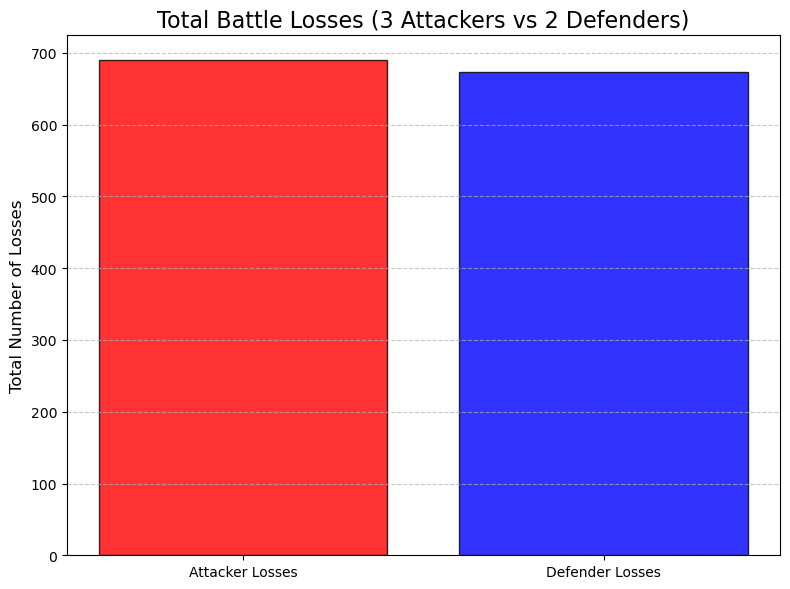

In [35]:
# Defining the barchart data
total_losses = [total_attacker_losses, total_defender_losses]

# Define labels and colors
labels = ['Attacker Losses', 'Defender Losses']
colors = ['red', 'blue']

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, total_losses, color=colors,edgecolor='black', alpha=0.8)
plt.title('Total Battle Losses (3 Attackers vs 2 Defenders)', fontsize=16)
plt.ylabel('Total Number of Losses', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

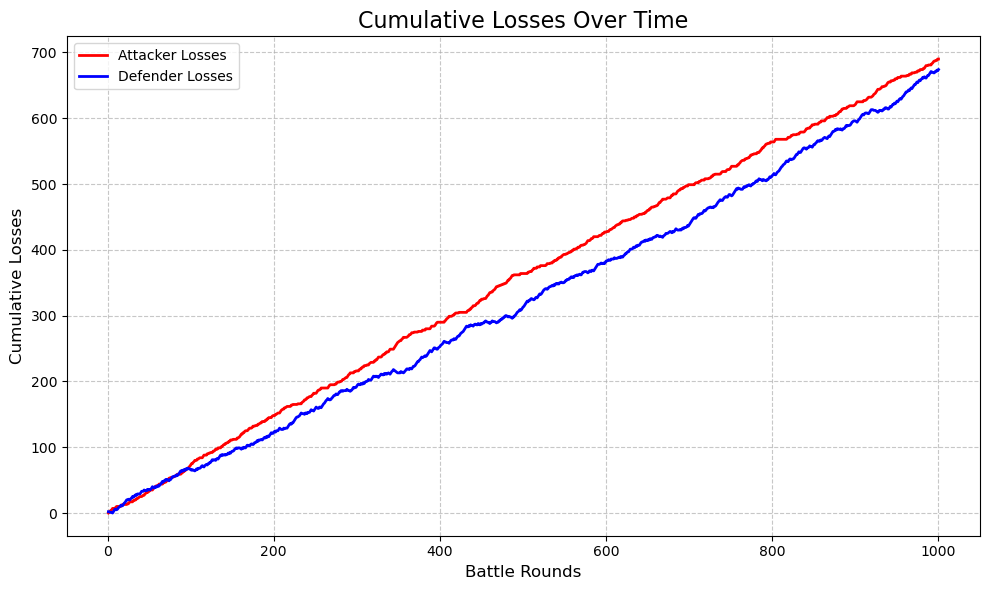

In [36]:
# Calculate cumulative losses for attackers and defenders
attacker_cumsum = np.cumsum(attacker_losses_list)
defender_cumsum = np.cumsum(defender_losses_list)

plt.figure(figsize=(10, 6))

# Plot cumulative losses for attackers
# The +1 ensures the x-axis starts at 1 and includes all x_repeats battle rounds
plt.plot(range(1, x_repeats + 1), attacker_cumsum, label='Attacker Losses', color='red', linewidth=2)
# Plot cumulative losses for defenders
# The +1 ensures the x-axis starts at 1 and includes all x_repeats battle rounds
plt.plot(range(1, x_repeats + 1), defender_cumsum, label='Defender Losses', color='blue', linewidth=2)

# Create a line chart
plt.title('Cumulative Losses Over Time', fontsize=16)
plt.xlabel('Battle Rounds', fontsize=12)
plt.ylabel('Cumulative Losses', fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.legend() 
plt.tight_layout()
plt.show()


[Reference: numpy.cumsum() in Python](https://www.geeksforgeeks.org/numpy-cumsum-in-python/)<br/>
[Reference: Python range() function](https://www.geeksforgeeks.org/numpy-cumsum-in-python/)<br/>